# A_Task

### 1)Описание:

Есть 100 значений некоторой абстрактной переменной, по которым была обучена модель. Затем была посчитана среднеквадратическая ошибка (MSE). Для 80 случаев разница истинного и предсказанного значения составляет 0,5, а для остальных 20 случаев равняется -0,3. Вы знаете, что модель была обучена неверно. Если добавить к ответам модели некоторую константу C, то результат улучшится. Существует ли такая константа? Если да, найдите её.

Небольшое замечание: Условия можно понять неодназначно, вы явно указываете что посчитали MSE на всех данных, но указание об отрицательном выходе могут спутать слегка. Я понимаю что MSE не может выдавать отрицательных значений, но кто-то из участнников мог запутаться. Как я понял вашу задачу:

У нас есть некий датасет, и нам сказано что разница выхода из нашей сети и лейбла для первых 80 составляет 0.5, а для остальных 20 0.3. Сам первичный MSE нам не дан и нас просят найти константу, которую мы можем подставить в формулу mse, а конкретнее, в сумму перед возведением в квадрат, причем такую константу, которая улучшит mse_score

### Решение:

Ответ: Да, существует и ее примерное значение будет равно: -0.332 

В качестве доказательства ответа я написал код, который подбирает константу для заданных значений.
В этом коде я считаю mse_score для различных значений переменной C:

mse_score without variable: 0.21639999999999998 

mse_score with varuable: 
 variable: -0.3319999999999994 
 score: 0.10617600000000003 



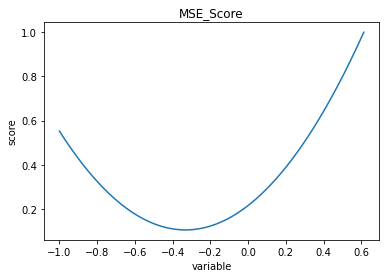

In [1]:
import matplotlib.pyplot as plt

class Iterator:
    def __init__(self, step):
        self.start = -1
        self.end = 1
        self.num = self.start
        self.step = step
        
    def __iter__(self):
        return self
    
    def __next__(self):
        if self.num < self.end:
            num = self.num
            self.num += self.step
            return num

def mse_variable_score(variable):
    new_preds = [(variable + elem)**2 for elem in preds]
    return sum(new_preds) / len(new_preds)



condition = lambda index: 0.5 if index < 79 else -0.3
preds = list(map(condition, range(100)))

answers = []
variables = []
for i in Iterator(0.001):
    if i != None:
        score = mse_variable_score(i)
        if score <= 1:
            answers.append(mse_variable_score(i))
            variables.append(i)
    else:
        break

max_elem = 0
max_score = float("inf")

for index, score in enumerate(answers):
    if score < max_score:
        max_elem = variables[index]
        max_score = score
        
print("mse_score without variable:", mse_variable_score(0),"\n")
print("mse_score with varuable:", "\n", "variable:", max_elem,
      "\n", "score:", max_score, "\n")
plt.xlabel('variable')
plt.ylabel('score')
plt.title("MSE_Score")
plt.plot(variables, answers)
plt.show()

### 2)Описание:

Существует некий временной ряд, область допустимых значений которого [0; +∞). Допустим, это количество шагов. Предположим, вы используете два алгоритма машинного обучения для построения модели, предсказывающей количество шагов в определённый день, — градиентный бустинг и случайный лес. Какой из данных алгоритмов может возвращать отрицательные значения в качестве прогнозируемых и почему?

### Решение:

Ответ: Градиентный бустинг. Дальше я постараюсь объяснить почему:


1)Для начала дам краткий ответ почему это не может быть Random Forest: Поскольку особенностью этой модели является усреднение прогнозов всех деревьев, следовательно проблемой нашей модели является скорее то, что мы можем не отследить тенденцию в данных. Так как мы усредняем значения всех выходов, мы явно не можем получить что-то на подобии отрицательных значений на датасете, состоящем из положительных чисел.

Постараюсь предомонстрировать это на примере:

![](https://i.ibb.co/2ysJ0yL/Random-Forest-Diamonds.png)

На примере показано распределение цен на алмазы. А синия линия это выходы из модели классического RandomForestRegressor, невооруженным глазом видно, что модель обобщает данные, а конкретнее, модель не регистрирует выброс выделенный красным цветом. Ниже приведу пример работы обычной линейной регрессии:

![](https://i.ibb.co/hCnTL6Z/Linear-Regression-Diamonds.png)

Как мы можем заметить, обычная линейная регрессия регестрирует этот выброс. Возможные способы решения подобной проблемы:

* Использовать  линейную модель, например Логистическую регрессию.

* Использовать глубокие модели, зачастую глубокая модель с правильной архитектурой будет лучшим решением в подобных ситуациях.

* Использовать модификацию Random Forest - RERFs.

2)Так как Gradient Boosting последовательно подгоняет деревья регрессии к остаткам предыдущего этапа обучения, можно заметить следующее: Если дерево на текущем этапе предсказывает значение, превышающее истинное значение конкретного обучающего примера, остаток на этом этапе для этого примера будет отрицательным, и поэтому дерево регрессии на следующем этапе  столкнется с отрицательными целевыми значениями. Поскольку модель складывает все эти деревья, чтобы сделать окончательный прогноз может возникнуть ситуациия, когда сумма отрицательных остатков превысит положительные выходы и мы получим отрицательный прогноз модели. Подобное часто происходит при увеличении количества решающих деревьев. Подобное поведение вполне нормально для нашей модели, в таких ситуациях не стоит волноваться, лучше подождать окончания обучения модели и сделать выводы уже после.

### 3)Описание:

Предположим, мы обучили линейную модель. Анализируя остатки модели, мы обнаружили значительную гетероскедастичность. Ваш коллега предложил использовать стандартные ошибки в форме Уайта, чтобы добиться лучшего качества модели. Снова обучили модель, однако R-квадрат остался тем же. Предложите объяснение этого явления. Приведите необходимые выкладки.

### Решение:

### 4)Описание:

С помощью некоторого датчика мы наблюдаем за температурой в холодильном отделении. Система должна поддерживать околонулевое значение. При поступлении нового измерения с датчика мы должны отдавать в stdout значение стандартного отклонения, рассчитанного по всей истории наблюдений.

```
stream = Stream(port=port, host=host)
while  stream.has_next():
    value = stream.next_value()
    # std calculation TBD
    print(std_value)
```
    
stream – это поток измерений с датчика, у него есть два метода:

• has_next() — проверяет, есть ли следующее значение, возвращает bool,

• next_value() — возвращает поступившее измерение, float.

Напишите код, вычисляющий стандартное отклонение при условии, что он должен работать на машине с оперативной памятью, не превышающей 100 МБ (из которых больше половины уже занято Python’ом :))

### Решение:

Довольно тривиальная реализация, поскольку у нас во время вычислений нет необходимости хранить все значения, мы можем для каждого элемента считать как длину выборки так и среднее значение по выборке, на основании предыдущих значений. Для удобства тестирования я создал класс Stream по предложенному вами тз. Node: сделать генерацию чисел во время работы, а не предварительно генерить их. Node: сравнить вычисления с нормальной стд-ной функцией на всем массиве. Node: подумать о реализации за O(n), нынешняя реализация неверная, смотри формулу std.

In [38]:
from numpy.random import rand

class Stream:
    def __init__(self, port, host):
        self.port = port
        self.host = host
        self.numbers = rand((10))
        self.current_index = 0
        
    def has_next(self):
        if self.current_index < len(self.numbers):
            return True
        else:
            return False
    
    def next_value(self):
        cur_value = self.numbers[self.current_index]
        self.current_index += 1
        return cur_value

In [44]:
stream = Stream(port = "Vozmite na stazhku", host = "plez")

sum_of_values = 0
current_median_value = 0
number_of_values = 0

while  stream.has_next():
    
    value = stream.next_value()
    sum_of_values += value
    number_of_values += 1
    current_median_value = sum_of_values / number_of_values
    std_value = sqrt((value - current_median_value)**2
                     / number_of_values)
    
    print(std_value)

0.0
0.04521496116868177
0.253751585083922
0.14410228413408355
0.05344737609175367
0.0392246488500048
0.13545103973846465
0.10836872552183358
0.13593280047884157
0.09523180501127582


# B_Task

### Описание:

Создан класс Task, который может выполнять некие расчёты (задачи). Статистику по выполненным расчётам собирает класс Counter. Задачи выполняются в файле main.py в несколько потоков. Но в этом коде есть баг, поэтому расчёты выполняются неверно. Сделайте ревью кода и найдите все баги, чтобы расчеты были корректными, а код понятным и стилистически правильным.

```
# main.py
from concurrent.futures import ThreadPoolExecutor
from counter import Counter
from task import Task
new_counter = Counter()
values = [2]*10
tasks = []
for value in values:
    tasks.append(Task(value))
with ThreadPoolExecutor(max_workers=2) as executor:
    for task in tasks:
        executor.submit(new_counter.update, task.execute())
print(new_counter.value)
# task.py
import time
class Task:
    def __init__(self, value):
        self.status = 'ready'
        self.value = value
    def execute(self):
        new_value = self.value**2
        self.value = new_value
        return self.value
# counter.py
import time
class Counter:
    def __init__(self):
        self.value = 0
    def update(self, new_value):
        local = self.value
        local += new_value
        time.sleep(0.1)
        self.value = local
```

### Решение:


Насколько я понимаю, у этой задачи нет какого-то конкретного и явно верного решения. Скорее это задача на то, чтоб оформить правильно код и сделать его более читабильным. Поэтому я слегка исправил классы, убрал странные и лишние действия и также придумал какую хотя бы более менее логически верную задачу этот код мог бы исполнять. Что было изменено:

1)Разбил все 3 файла на 3 отдельные ячейки, для более удобной работы с кодом в дальнейшем. Также это логически верно со стороны архитектуры, так как мы эмилируем некую разработку абстрактной программы, где сущности наших задач разбиты на классы.

2)Добавил разбиения между методами классов.

3)Я не очень понял почему в коде значения поля value у класса Task во время вызова метода update выносилось в некоторую переменную локал, а потом только к ней добавлялось значение new_value, а после все это перезаписывалось обратно в поле класса. Имхо было бы проше сразу к полю этого класса добавлять это значение, без лишних танцев с бубном и переменной local

4)В классе execute тоже довольно кринжовая реализация, ибо метод execute одновременно и возводит поле в квадрат и возвращает его на вывод, в моем понимании это должно работать следующим образом: метод execute возводит поле в квадрат, а новый метод get_value возвращает значение переменной value. Все же все мы здесь немножечко программисты и хотим чтобы методы класса делали одно определенное действие.


5)В файле main довольно странно отдельно создавать массив tasks и заполнять его с помощью отдельно цикла, по - моему мнению в такой тривиальной ситуации можно воспользоваться генератором списка и не разбивать код на 3 отдельные строки вместо одной.

6)Также довольно странно что мы явно получаем доступ к полю класса Counter, по - моему мнению лучше завести для этого отдельный геттер.


In [5]:
# task.py
import time

## расчеты
class Task:
    def __init__(self, value):
        self.status = 'ready'
        self.value = value
        
        
    def execute(self):
        self.value **= 2
        
    def get_value(self):
        return self.value

In [6]:
# counter.py
import time

# статистика
class Counter:
    
    def __init__(self):
        self.value = 0
        
    def update(self, new_value):
        time.sleep(0.1)
        self.value += new_value
        
    def get_value(self):
        return self.value

In [7]:
# main.py
from concurrent.futures import ThreadPoolExecutor
# from counter import Counter
# from task import Task


new_counter = Counter()
values = [2] * 10
tasks = [Task(value) for value in values]

    
with ThreadPoolExecutor(max_workers = 2) as executor:
    for task in tasks:
        executor.submit(task.execute())
        executor.submit(new_counter.update(task.get_value()))
        print(new_counter.get_value())
        
print("\n", new_counter.get_value())

4
8
12
16
20
24
28
32
36
40

 40


# C_Task

### Описание:

Летняя стажировка 2021 в команде продуктовой аналитики ВКонтакте предполагает создание модели, предсказывающей возраст/пол пользователя. И хотя в случае с подобными задачами велик соблазн приступить непосредственно к последнему шагу, наибольшее внимание всё же стоит уделить разведочному анализу данных (Exploratory Data Analysis — EDA). Чтобы мы могли оценить ваш уровень навыка анализа данных на Python, предлагаем провести EDA прикрепленного датасета — он включает в себя некоторые характеристики пользователей нашей платформы. Пожалуйста, проведите анализ и ответьте на следующие вопросы:

• Сколько различных групп пользователей можно выделить из данных?
• Каковы отличительные особенности этих групп? Как их можно интерпретировать?

Мы призываем вас подойти к задаче творчески и постараться найти как можно больше интересных взаимосвязей — порой интересные открытия совершаются случайно :)

Переменные:
```
• hashed_user_id — идентификатор пользователя;
• user_age — возраст;
• user_friends — количество друзей;
• user_communities_count — количество сообществ, в которых он состоит;
• user_fans_count — количество людей, подписанных на пользователя;
• user_subscriptions_count — количество подписок (людей или сообществ) пользователя;
• user_blacklist_count — количество профилей, помещенных в чёрный список;
• user_blacklisted_by_count — сколько раз пользователя помещали в чёрные списки;
• device_brand — производитель устройства пользователя;
• device_model — модель устройства;
• days_in_vk_1_week — количество дней присутствия в VK за последнюю неделю;
• days_in_vk_2_weeks — количество дней присутствия в VK за последние 2 недели;
• days_in_vk_4_weeks — количество дней присутствия в VK за последние 4 недели;
• messaging_total — общее количество отправленных сообщений;
• calls_accepted — количество принятых звонков;
• timespent_total — проведённое время в VK за день (суммарно);
• timespent_im — время, затраченное на личные сообщения;
• timespent_feed — время, затраченное на чтение ленты;
• timespent_photo — время, затраченное на просмотр фотографий;
• timespent_video — время, затраченное на просмотр видео;
• timespent_clips — время, затраченное на просмотр клипов;
• timespent_audio — время, затраченное на прослушивание музыки;
• timespent_story — время, затраченное на просмотр историй.
```

### Решение:

#### Загрузка датасета

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("data/data.csv")

#### Получение базового понимания наших данных

In [2]:
data.head()

,hashed_user_id,user_age,user_sex,user_friends,user_communities_count,user_fans_count,user_subscriptions_count,device_brand,device_model,days_in_vk_1_week,...,messaging_total,calls_accepted,timespent_total,timespent_im,timespent_feed,timespent_photo,timespent_video,timespent_clips,timespent_audio,timespent_story
0,$1VAQ97BmCCZc,26,male,481,476,361,177,lge,LG-M250,7,...,1,0,501,0,55,0,0,0,0,0
1,$1v/FKogrWnz2,26,female,115,72,419,0,Apple,iPhone 7,7,...,23,0,0,0,0,0,0,0,0,0
2,$1eoMEtyVB3XM,26,female,297,317,2681,0,Apple,iPhone 11 Pro Max,7,...,33,0,0,0,0,0,0,0,0,0
3,$12ZhvNRMpcZU,20,male,147,130,216,0,samsung,SM-G970F,7,...,1,0,5085,101,2371,0,0,0,0,0
4,$1mD0tDgB13tk,39,male,138,311,51,33,NaN,NaN,7,...,3,0,1301,0,0,0,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125893 entries, 0 to 125892
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   hashed_user_id            125893 non-null  object
 1   user_age                  125893 non-null  int64 
 2   user_sex                  125893 non-null  object
 3   user_friends              125893 non-null  int64 
 4   user_communities_count    125893 non-null  int64 
 5   user_fans_count           125893 non-null  int64 
 6   user_subscriptions_count  125893 non-null  int64 
 7   device_brand              107049 non-null  object
 8   device_model              106748 non-null  object
 9   days_in_vk_1_week         125893 non-null  int64 
 10  days_in_vk_2_weeks        125893 non-null  int64 
 11  days_in_vk_4_weeks        125893 non-null  int64 
 12  days_in_vk_8_weeks        125893 non-null  int64 
 13  messaging_total           125893 non-null  int64 
 14  call

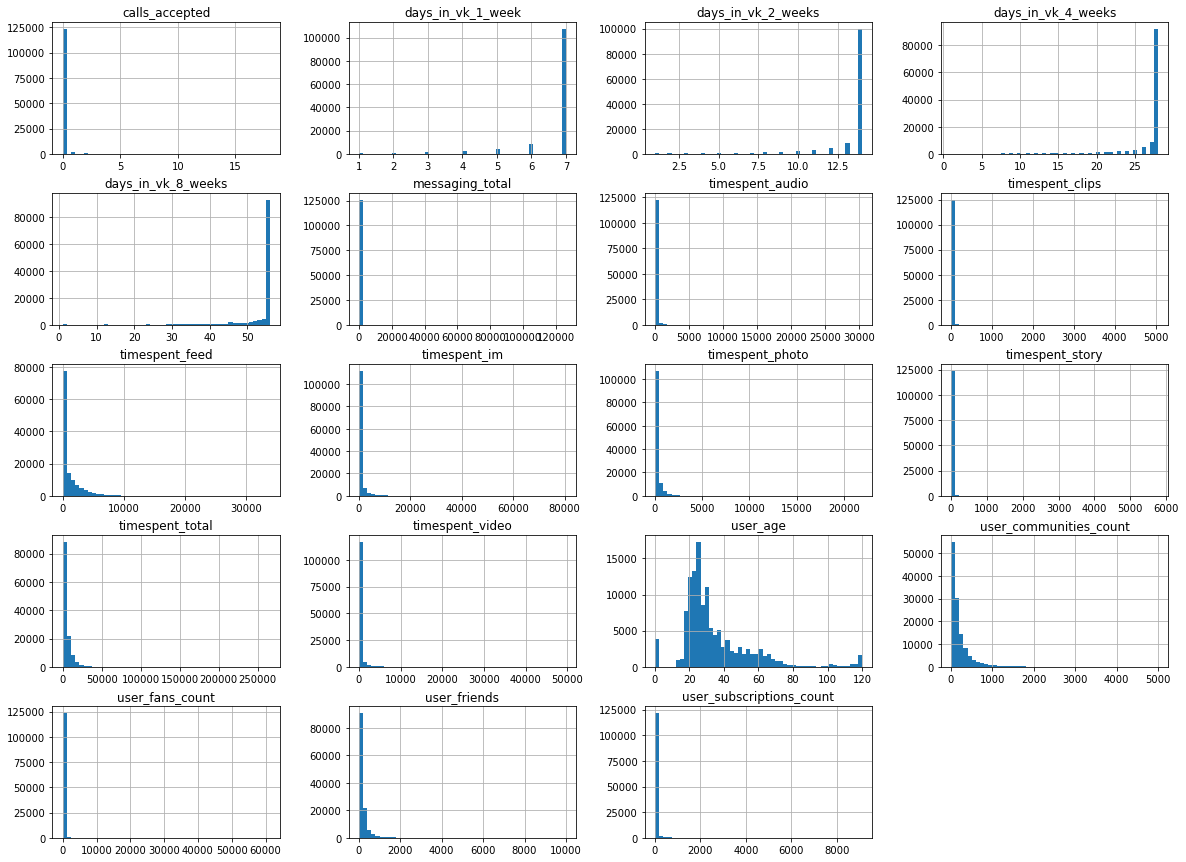

In [3]:
data.hist(bins = 50, figsize = (20, 15))
data.info()
plt.show()

### Мини - Вывод:

Можно заметить что у нас есть поля типа object, и int. Также, что довольно очевидно, можно заметить что большинство юзеров вк находятся на промежутке от 20, до 40 лет. Больше информации из этих графиков извлечь невозможно, нам мешают выбросы. Как можно заметить, большинству наших графиков портят люди с высокой статистикой. Таких людей можно выделить в категорию: Знаменитости, в дальнейшем мы с ней будем еще работать.

### Попробуем преобразовать наши фичи, и сделаем более читабельные графики

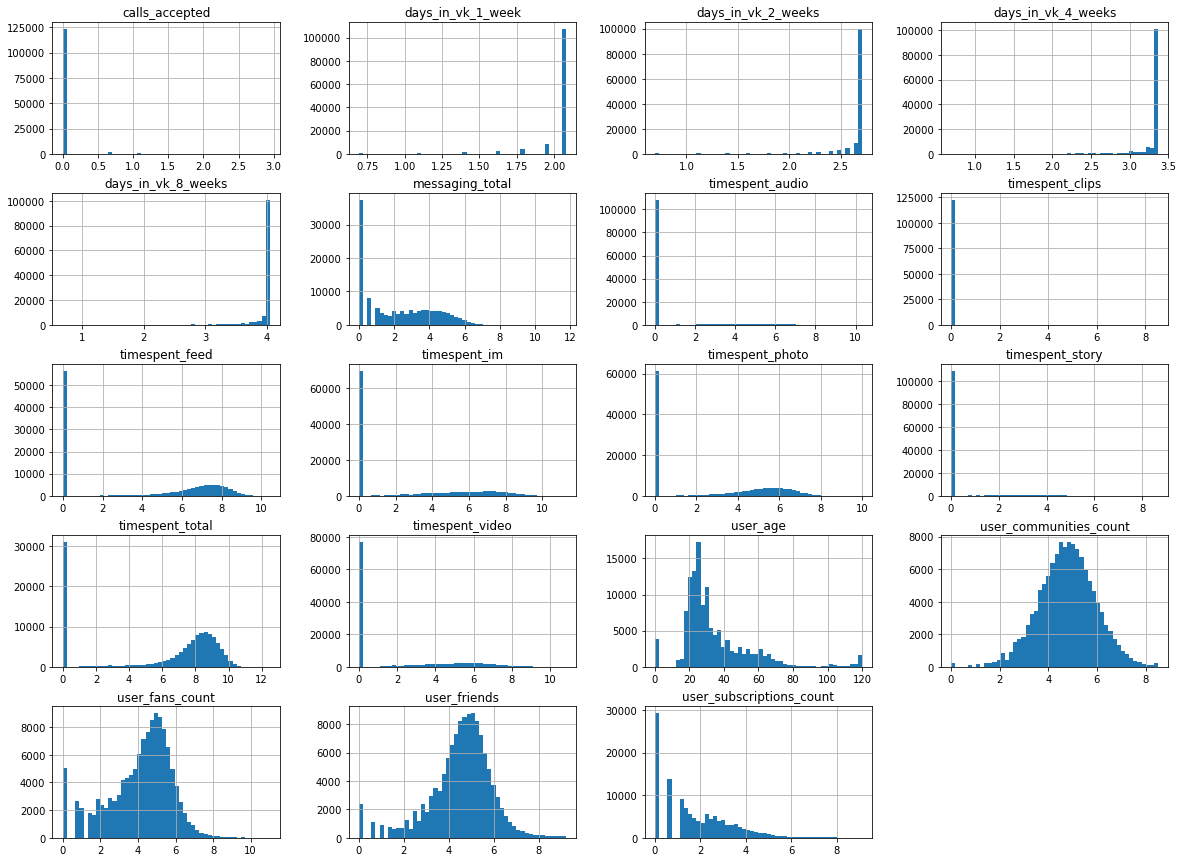

In [4]:
import numpy as np

data1 = data.copy()
strange_features = ["hashed_user_id", "device_brand", "device_model", "user_age", "user_sex"]
old_features_names = [name for name in data if name not in strange_features]
data1 = data1.drop(old_features_names, axis = 1)

index = len(list(name for name in data1))

for name in old_features_names:
    data1.insert(index - 1, name, np.log1p(data[name]))
    index += 1
    
data1.hist(bins = 50, figsize = (20, 15))
plt.show()

### Так-то лучше, по приведенным гистограммам можно уже строить выводы:

Надеюсь, что меня за эти выводы никто не задушит, я всего лишь демонстрирую статистику =)

1)Большинству не интересны такие функции как: звонки, видео, истории, клипы(комично, ведь их сейчас только ленивый не рекламирует), аудио, лента(справедливости ради тут все не так уж и плачевно, но цифры говорят сами за себя), фото. Предлагаю свою кандидатуру для решения этиъ проблем, хехехх)

Я собственно это к чему, их можно дропнуть и ничего не потерять )

2)Большинство пользователей заходят в вк каждый день, интересной метрикой было бы отношение возвраста пользователя к его количеству посещений за последнюю неделю.

Так что фичи со временем, проведенным в сети тоже можно спокойно дропать.

3)У большинства пользователей в районе 60 друзей и подписчиков.

### Ради интереса попробую получить новые метрики и проследить их корреляцию с user_age

In [5]:
# index = len(list(name for name in data1))

# futures_that_needs_be_dropped = []
# for i in range(len(old_features_names)):
#     for j in range(i, len(old_features_names)):
#         data1.insert(index - 1, old_features_names[i] + old_features_names[j], 
#                     data1[old_features_names[i]] / data1[old_features_names[j]])
#         index += 1


In [6]:
data1 = data1.drop("user_age", axis = 1)


In [7]:
normal_metrics = ["user_communities_count", "user_subscriptions_count",
                 "user_friends", "messaging_total", "timespent_photo"]

for name in data1:
    if name not in normal_metrics and name not in strange_features:
        for i in range(len(data[name])):
            data1[name][i] = 1 if data[name][i] > 0 else 0

c:\users\79514\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


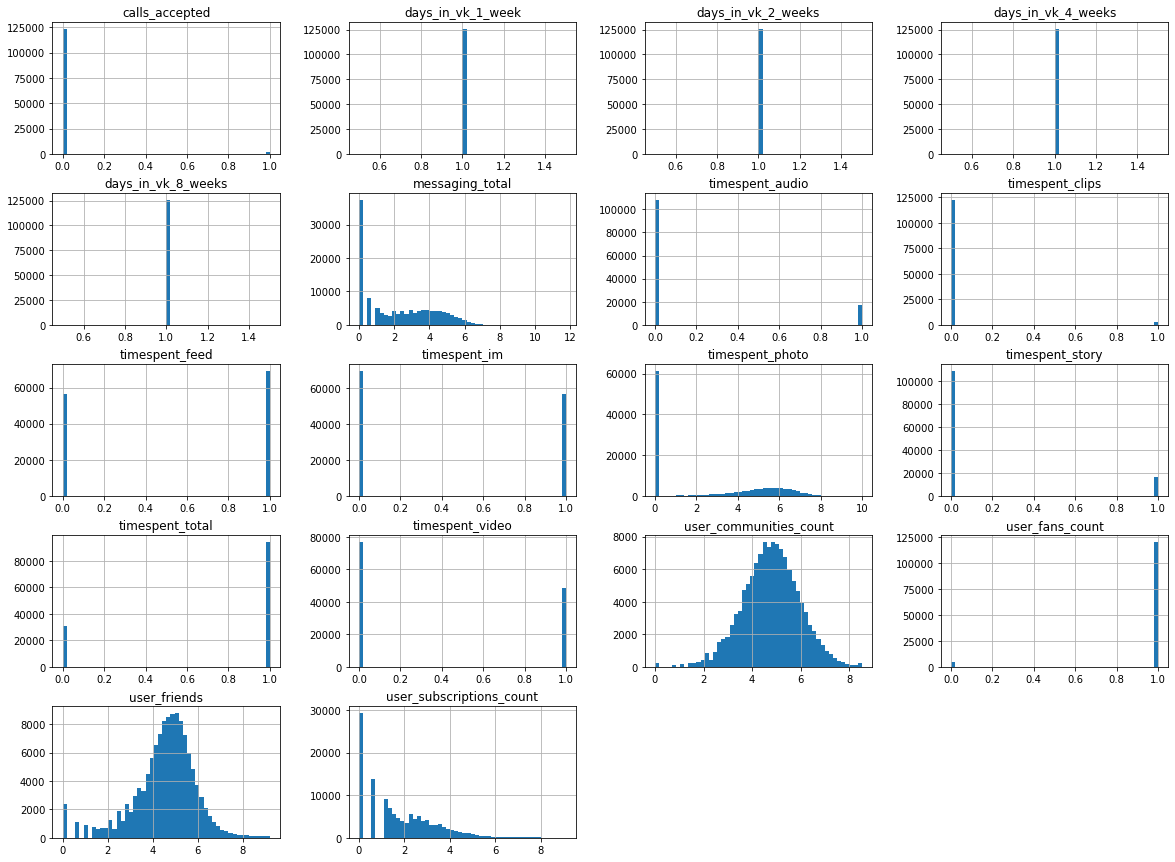

In [9]:
data1.hist(bins = 50, figsize = (20, 15))
plt.show()

In [8]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125893 entries, 0 to 125892
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   hashed_user_id            125893 non-null  object 
 1   user_sex                  125893 non-null  object 
 2   device_brand              107049 non-null  object 
 3   user_friends              125893 non-null  float64
 4   user_communities_count    125893 non-null  float64
 5   user_fans_count           125893 non-null  float64
 6   user_subscriptions_count  125893 non-null  float64
 7   days_in_vk_1_week         125893 non-null  float64
 8   days_in_vk_2_weeks        125893 non-null  float64
 9   days_in_vk_4_weeks        125893 non-null  float64
 10  days_in_vk_8_weeks        125893 non-null  float64
 11  messaging_total           125893 non-null  float64
 12  calls_accepted            125893 non-null  float64
 13  timespent_total           125893 non-null  f